In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

from Siamese.python_classes.training_models import train_dataset, bagging_ensamble_training

In [2]:
curent_dirctory = os.getcwd()
file_directory = "/Archiv/Classical/"
npz_files = [f for f in os.listdir(curent_dirctory + file_directory) if f.endswith('.npz')]
print(npz_files)
print(len(npz_files))

['26_optdigits.npz', '42_WBC.npz', '21_Lymphography.npz', '8_celeba.npz', '33_skin.npz', '34_smtp.npz', '28_pendigits.npz', '39_vertebral.npz', '11_donors.npz', '43_WDBC.npz', '7_Cardiotocography.npz', '36_speech.npz', '5_campaign.npz', '44_Wilt.npz', '10_cover.npz', '46_WPBC.npz', '37_Stamps.npz', '2_annthyroid.npz', '27_PageBlocks.npz', '31_satimage-2.npz', '3_backdoor.npz', '38_thyroid.npz', '29_Pima.npz', '24_mnist.npz', '15_Hepatitis.npz', '22_magic.gamma.npz', '16_http.npz', '32_shuttle.npz', '12_fault.npz', '47_yeast.npz', '13_fraud.npz', '35_SpamBase.npz', '41_Waveform.npz', '17_InternetAds.npz', '6_cardio.npz', '23_mammography.npz', '40_vowels.npz', '9_census.npz', '45_wine.npz', '25_musk.npz', '1_ALOI.npz', '18_Ionosphere.npz', '20_letter.npz', '19_landsat.npz', '14_glass.npz', '30_satellite.npz', '4_breastw.npz']
47


In [3]:
def filter_big_files(file: str, current_directory: str, file_classic_dataset: str) -> str:
    data: np.lib.npyio.NpzFile = np.load(current_directory + file_classic_dataset + file, allow_pickle = True)
    X: np.ndarray = data['X']

    samples, _ = X.shape
    if samples >= 15000:
        return file
    
medium_files = [result for f in npz_files if (result := filter_big_files(f, curent_dirctory, file_directory)) is not None]
print(medium_files)
print(len(medium_files))

['8_celeba.npz', '33_skin.npz', '34_smtp.npz', '11_donors.npz', '5_campaign.npz', '10_cover.npz', '3_backdoor.npz', '22_magic.gamma.npz', '16_http.npz', '32_shuttle.npz', '13_fraud.npz', '9_census.npz', '1_ALOI.npz']
13


In [4]:
random_seed = random.randint(0, 100)
print(f'Der Seed ist: {random_seed}')

Der Seed ist: 61


In [6]:
roc_all = []
pr_all = []

counter = 0
for file in medium_files:
    print(f'counter für die Anzhal der Files: {counter}')
    roc, pr = train_dataset(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.05,
                            contrastiv_margin=10.0,
                            lr_siamese=0.0001,
                            lr_classifier=0.001,
                            epochs_siamese=20,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            )
    
    roc_all.append(roc)
    pr_all.append(pr)
    counter += 1

counter für die Anzhal der Files: 0
##############Start Training with Dataset 8_celeba.npz######################
Die gesamte Länge der Daten ist 202599
Die Länge das Anomalydatensatzen ist 4547 und der normalen daten ist: 198052
Es werden 5.0% der Daten gelabeld
Es wurden zwei Datensätze erstellt, der erste mit der beiden Längen 227 und 1000
Die ungelabelden parts dazu sind 4320 und 197052
Der Siamese Datasatz wurde mit einer gesamtLänge von 1278529 erstellt
Die länge des ungelabendeten Datensatzen ist: 201372
Die länge des ungelabendeten Datenloader ist: 787
Das ist die verwendete loss<function binary_cross_entropy at 0x134adc220>
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 1138.1417943822728
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 879.445772023244
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 807.5967447244608
----------------Start trainign Epoche 3----------------
Epoche: 3 

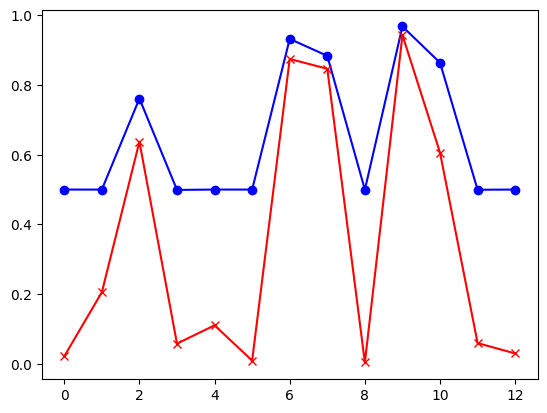

In [7]:
plt.plot(range(len(roc_all)), roc_all, marker='o', color='b')
plt.plot(range(len(pr_all)), pr_all, marker='x', color='r')
plt.show()

In [13]:
roc_all_lower_learning = []
pr_all_lower_learning = []

counter = 0
for file in medium_files:
    print(f'counter für die Anzhal der Files: {counter}')
    roc, pr = train_dataset(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.05,
                            contrastiv_margin=10.0,
                            lr_siamese=0.00001,
                            lr_classifier=0.0001,
                            epochs_siamese=20,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            )
    
    roc_all_lower_learning.append(roc)
    pr_all_lower_learning.append(pr)
    counter += 1

counter für die Anzhal der Files: 0
##############Start Training with Dataset 8_celeba.npz######################
Die gesamte Länge der Daten ist 202599
Die Länge das Anomalydatensatzen ist 4547 und der normalen daten ist: 198052
Es werden 5.0% der Daten gelabeld
Es wurden zwei Datensätze erstellt, der erste mit der beiden Längen 227 und 1000
Die ungelabelden parts dazu sind 4320 und 197052
Der Siamese Datasatz wurde mit einer gesamtLänge von 1278529 erstellt
Die länge des ungelabendeten Datensatzen ist: 201372
Die länge des ungelabendeten Datenloader ist: 787
Das ist die verwendete loss<function binary_cross_entropy at 0x134adc220>
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 1671.8359468843844
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 1458.8312048132116
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 1283.7850770692567
----------------Start trainign Epoche 3----------------
Epoche:

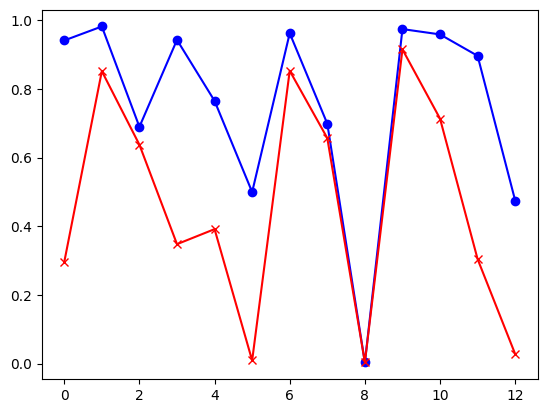

In [14]:
plt.plot(range(len(roc_all_lower_learning)), roc_all_lower_learning, marker='o', color='b')
plt.plot(range(len(pr_all_lower_learning)), pr_all_lower_learning, marker='x', color='r')
plt.show()

In [16]:
roc_all_more_ep = []
pr_all_more_ep = []

counter = 0
for file in medium_files:
    print(f'counter für die Anzhal der Files: {counter}')
    roc, pr = train_dataset(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.05,
                            contrastiv_margin=10.0,
                            lr_siamese=0.00001,
                            lr_classifier=0.0001,
                            epochs_siamese=30,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            )
    
    roc_all_more_ep.append(roc)
    pr_all_more_ep.append(pr)
    counter += 1

counter für die Anzhal der Files: 0
##############Start Training with Dataset 8_celeba.npz######################
Die gesamte Länge der Daten ist 202599
Die Länge das Anomalydatensatzen ist 4547 und der normalen daten ist: 198052
Es werden 5.0% der Daten gelabeld
Es wurden zwei Datensätze erstellt, der erste mit der beiden Längen 227 und 1000
Die ungelabelden parts dazu sind 4320 und 197052
Der Siamese Datasatz wurde mit einer gesamtLänge von 1278529 erstellt
Die länge des ungelabendeten Datensatzen ist: 201372
Die länge des ungelabendeten Datenloader ist: 787
Das ist die verwendete loss<function binary_cross_entropy at 0x134adc220>
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 1671.8359468843844
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 1458.8312048132116
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 1283.7850770692567
----------------Start trainign Epoche 3----------------
Epoche:

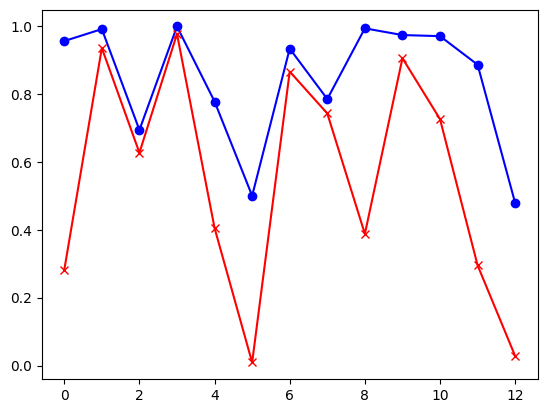

In [17]:
plt.plot(range(len(roc_all_more_ep)), roc_all_more_ep, marker='o', color='b')
plt.plot(range(len(pr_all_more_ep)), pr_all_more_ep, marker='x', color='r')
plt.show()

In [18]:
roc_all_1_percent = []
pr_all_1_percent = []

counter = 0
for file in medium_files:
    print(f'counter für die Anzhal der Files: {counter}')
    roc, pr = train_dataset(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.01,
                            contrastiv_margin=10.0,
                            lr_siamese=0.00001,
                            lr_classifier=0.0001,
                            epochs_siamese=30,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            )
    
    roc_all_1_percent.append(roc)
    pr_all_1_percent.append(pr)
    counter += 1

counter für die Anzhal der Files: 0
##############Start Training with Dataset 8_celeba.npz######################
Die gesamte Länge der Daten ist 202599
Die Länge das Anomalydatensatzen ist 4547 und der normalen daten ist: 198052
Es werden 1.0% der Daten gelabeld
Es wurden zwei Datensätze erstellt, der erste mit der beiden Längen 45 und 1000
Die ungelabelden parts dazu sind 4502 und 197052
Der Siamese Datasatz wurde mit einer gesamtLänge von 1047025 erstellt
Die länge des ungelabendeten Datensatzen ist: 201554
Die länge des ungelabendeten Datenloader ist: 788
Das ist die verwendete loss<function binary_cross_entropy at 0x134adc220>
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 413.1417749903896
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 391.19893925860345
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 372.86936787089974
----------------Start trainign Epoche 3----------------
Epoche: 3

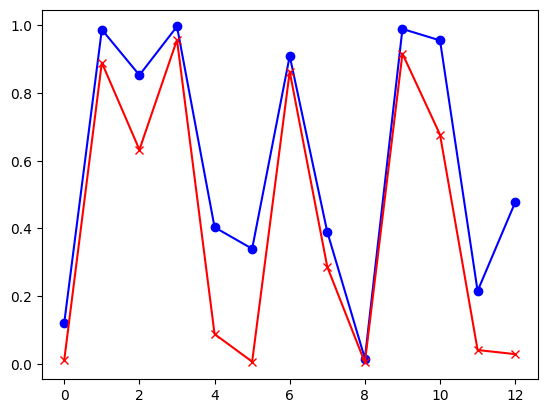

In [19]:
plt.plot(range(len(roc_all_1_percent)), roc_all_1_percent, marker='o', color='b')
plt.plot(range(len(pr_all_1_percent)), pr_all_1_percent, marker='x', color='r')
plt.show()

In [ ]:
roc_all_ens = []
pr_all_ens = []

counter = 0
for file in medium_files:
    print(f'counter für die Anzhal der Files: {counter}')
    roc, pr = bagging_ensamble_training(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.05,
                            contrastiv_margin=10.0,
                            lr_siamese=0.00001,
                            lr_classifier=0.0001,
                            epochs_siamese=20,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            len_dataset=100000,
                            )
    
    roc_all_ens.append(roc)
    pr_all_ens.append(pr)
    counter += 1